In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataclasses import dataclass
import pathlib

In [2]:
@dataclass(frozen=True)
class DatasetConfig:
    SEED_VALUE:  int = 41
    CUT_PLANE:   str = "sagital"
         
    DATA_ROOT_SOURCE_PATH: str = '/home/jovyan/data/auto-pet-iii/2024-05-10_Autopet_v1.1'
    MAIN_DATA_CSV_PATH: str = DATA_ROOT_SOURCE_PATH + '/fdg_metadata.csv'
    DATA_ROOT_TARGET:  str = f'/home/jovyan/data/segmentation/autopet-full-{CUT_PLANE}' 
    DATA_ROOT_TRAIN:  str = DATA_ROOT_TARGET + '/Train' 
    DATA_ROOT_VALID:  str = DATA_ROOT_TARGET + '/Valid'
    DATA_ROOT_TEST:   str = DATA_ROOT_TARGET + '/Test'
    DATA_TEST_GT:     str = DATA_ROOT_TARGET + '/Test.csv'

In [3]:
# train, val and test split

In [4]:
data_df = pd.read_csv(DatasetConfig.DATA_ROOT_TARGET + "/data_description.csv")
data_df

,Unnamed: 0,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
...,...,...,...,...,...,...,...,...,...,...,...
30740,30740,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,270,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30741,30741,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,271,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30742,30742,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,272,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30743,30743,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,273,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400


In [5]:
data_df.diagnosis.value_counts()

diagnosis
POSITIVE    30745
Name: count, dtype: int64

In [6]:
col_names = data_df.columns.to_list()
col_names[0] = "imageId"
col_names

['imageId',
 'Subject ID',
 'Study UID',
 'diagnosis',
 'condition',
 'sliceNum',
 'totalSlices',
 'imagePath',
 'segPath',
 'height',
 'width']

In [7]:
data_df.columns = col_names
data_df.head()

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400


In [8]:
# new height will be based on the mean value
data_df.height.describe()

count    30745.000000
mean       343.396455
std         91.927632
min        242.000000
25%        284.000000
50%        326.000000
75%        326.000000
max        661.000000
Name: height, dtype: float64

In [9]:
data_df[data_df.height > 395]

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
188,188,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,133,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
189,189,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,134,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
190,190,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,135,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
191,191,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,136,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
192,192,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,137,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400
...,...,...,...,...,...,...,...,...,...,...,...
30169,30169,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,327,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
30170,30170,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,328,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
30171,30171,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,329,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400
30172,30172,PETCT_4776e75543,1.3.6.1.4.1.14519.5.2.1.4219.6651.323483836183...,POSITIVE,MELANOMA,330,400,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_4776e75543-1.3.6.1.4.1.14519.5.2.1.4219...,649,400


In [10]:
data_df[data_df.height <= 395]

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400
...,...,...,...,...,...,...,...,...,...,...,...
30740,30740,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,270,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30741,30741,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,271,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30742,30742,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,272,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400
30743,30743,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,273,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400


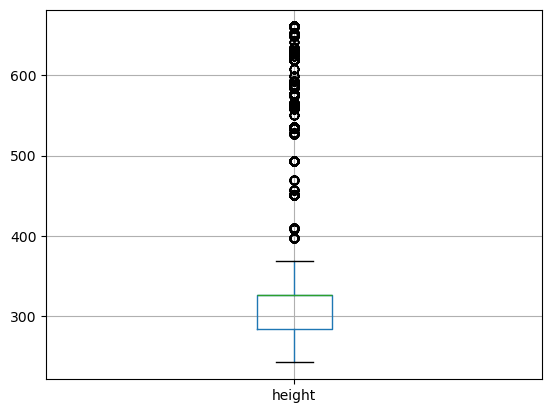

In [11]:
data_df.boxplot(column=["height"])
plt.show()

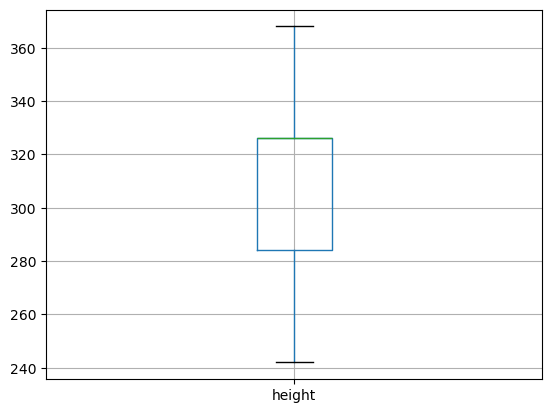

In [12]:
data_df[data_df.height <= 395].boxplot(column=["height"])
plt.show()

In [13]:
data_df[data_df.height <= 395].height.max()

368

In [14]:
data_df.condition.value_counts()

condition
LUNG_CANCER    11633
LYMPHOMA        9783
MELANOMA        9329
Name: count, dtype: int64

In [15]:
# verify distribution of conditions with this filter applied
data_df[data_df.height <= 395].condition.value_counts()

condition
LUNG_CANCER    11633
LYMPHOMA        9396
MELANOMA        5735
Name: count, dtype: int64

The filter applied right above shows that most of the images with a discrepant height petrain to the MELANOMA condition.

Since the final images will be resized to the 1024x1024 size and the image with highest height has 661px, all images will be maintained.

In [16]:
# keep original df and filter the data_df
# original_df = data_df.copy()
# data_df = data_df[data_df.height <= 395].copy()

# Split and Export Images

In [17]:
@dataclass(frozen=True)
class ImageResizeConfig:
    height: int = 368
    width: int = 400

In [18]:
def pre_process_and_export_record(row, is_segmentation=False):
    image_path = DatasetConfig.DATA_ROOT_TARGET + (row["segPath"] if is_segmentation else row["imagePath"])
    img = cv2.imread(image_path)
    # img = cv2.resize(img, (ImageResizeConfig.height, ImageResizeConfig.width))
    # image resize removed
    img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    
    img_modality = "SEG" if is_segmentation else "PET"
    
    destination_path = f"{DatasetConfig.DATA_ROOT_TARGET}/{row.subset}/{img_modality}"
    pathlib.Path(destination_path).mkdir(parents=True, exist_ok=True)
    destination_path = f"{destination_path}/{row.imageId}.png"
    
    cv2.imwrite(destination_path,img)

In [19]:
data_df["subset"] = None

In [20]:
data_df.head()

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,None


In [21]:
data_df.condition.value_counts()

condition
LUNG_CANCER    11633
LYMPHOMA        9783
MELANOMA        9329
Name: count, dtype: int64

In [22]:
data_df["Subject ID"].value_counts()

Subject ID
PETCT_d8d9e52cd5    264
PETCT_dc6174cb5d    250
PETCT_1285b86bea    209
PETCT_4c75fa4a5d    197
PETCT_35c9c85a96    192
                   ... 
PETCT_3ba0277c0c      5
PETCT_41fadf6520      4
PETCT_1f65acff65      4
PETCT_0223010e46      3
PETCT_5d994c3f44      2
Name: count, Length: 489, dtype: int64

Both `condition` and `Subject ID` have to be taken into account when splitting the dataset.

This dataset encompasses a total of 489 patients with 30.745 different images.

In [23]:
data_df[data_df.condition == "LUNG_CANCER"]["Subject ID"].value_counts().describe()

count    168.000000
mean      69.244048
std       35.365922
min        6.000000
25%       41.750000
50%       64.000000
75%       90.250000
max      172.000000
Name: count, dtype: float64

In [24]:
data_df[data_df.condition == "LYMPHOMA"]["Subject ID"].value_counts().describe()

count    144.000000
mean      67.937500
std       41.851422
min        3.000000
25%       34.000000
50%       62.000000
75%       93.250000
max      180.000000
Name: count, dtype: float64

In [25]:
data_df[data_df.condition == "MELANOMA"]["Subject ID"].value_counts().describe()

count    177.000000
mean      52.706215
std       50.048200
min        2.000000
25%       15.000000
50%       39.000000
75%       68.000000
max      264.000000
Name: count, dtype: float64

Our rationale approach to split the dataset is to consider the proportion of each quartile. 80% of the patients within each quartile for image count per patient will be selected. Then, all the images pertaining to each patient will be considered into the respective subset (train or test). 

In [26]:
data_df["Subject ID"].value_counts().reset_index(name='counts')

,Subject ID,counts
0,PETCT_d8d9e52cd5,264
1,PETCT_dc6174cb5d,250
2,PETCT_1285b86bea,209
3,PETCT_4c75fa4a5d,197
4,PETCT_35c9c85a96,192
...,...,...
484,PETCT_3ba0277c0c,5
485,PETCT_41fadf6520,4
486,PETCT_1f65acff65,4
487,PETCT_0223010e46,3


In [27]:
def get_subject_id_list(sub_df):
    q1 = np.percentile(sub_df.counts, 25)
    q2 = np.percentile(sub_df.counts, 50)
    q3 = np.percentile(sub_df.counts, 75)
    
    print(q1, q2, q3)
    section_1 = sub_df[sub_df.counts < q1]
    section_2 = sub_df[(sub_df.counts >= q1) & (sub_df.counts < q2)]
    section_3 = sub_df[(sub_df.counts >= q2) & (sub_df.counts < q3)]
    section_4 = sub_df[sub_df.counts >= q3]
    
    selected_records = pd.concat([
        section_1.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_2.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_3.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE),
        section_4.sample(frac=0.8, random_state=DatasetConfig.SEED_VALUE)
    ])

    train_records = selected_records["Subject ID"].to_list()
    test_records = sub_df.drop(selected_records.index, inplace=False)["Subject ID"].to_list()
    print(f"{len(train_records)}/{len(test_records)}")
    
    return train_records, test_records
    

In [28]:
train_melanoma, test_melanoma = get_subject_id_list(data_df[data_df.condition == "MELANOMA"]["Subject ID"].value_counts().reset_index(name='counts'))

15.0 39.0 68.0
142/35


In [29]:
train_lymphoma, test_lymphoma = get_subject_id_list(data_df[data_df.condition == "LYMPHOMA"]["Subject ID"].value_counts().reset_index(name='counts'))

34.0 62.0 93.25
115/29


In [30]:
train_lung, test_lung = get_subject_id_list(data_df[data_df.condition == "LUNG_CANCER"]["Subject ID"].value_counts().reset_index(name='counts'))

41.75 64.0 90.25
135/33


In [31]:
train_subjects = [*train_melanoma, *train_lymphoma, *train_lung]
test_subjects = [*test_melanoma, *test_lymphoma, * test_lung]

In [32]:
print(len(train_subjects),len(test_subjects))

392 97


In [33]:
train_df = data_df[data_df["Subject ID"].isin(train_subjects)].copy()
train_df.subset = "Train"
train_df

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
188,188,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,133,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400,Train
189,189,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,134,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400,Train
190,190,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,135,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400,Train
191,191,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,136,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400,Train
192,192,PETCT_7ce196485f,1.3.6.1.4.1.14519.5.2.1.4219.6651.226902065774...,POSITIVE,MELANOMA,137,400,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_7ce196485f-1.3.6.1.4.1.14519.5.2.1.4219...,558,400,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
30740,30740,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,270,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
30741,30741,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,271,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
30742,30742,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,272,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train
30743,30743,PETCT_3ba0277c0c,1.3.6.1.4.1.14519.5.2.1.4219.6651.146051428537...,POSITIVE,MELANOMA,273,400,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_3ba0277c0c-1.3.6.1.4.1.14519.5.2.1.4219...,308,400,Train


In [34]:
test_df = data_df[data_df["Subject ID"].isin(test_subjects)].copy()
test_df.subset = "Test"
test_df

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
0,0,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,157,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
1,1,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,158,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
2,2,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,159,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
3,3,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,160,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
4,4,PETCT_f21755a99b,1.3.6.1.4.1.14519.5.2.1.4219.6651.631135993785...,POSITIVE,LYMPHOMA,161,400,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_f21755a99b-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
...,...,...,...,...,...,...,...,...,...,...,...,...
30591,30591,PETCT_37472e737f,1.3.6.1.4.1.14519.5.2.1.4219.6651.321569127236...,POSITIVE,LUNG_CANCER,236,400,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
30592,30592,PETCT_37472e737f,1.3.6.1.4.1.14519.5.2.1.4219.6651.321569127236...,POSITIVE,LUNG_CANCER,237,400,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
30593,30593,PETCT_37472e737f,1.3.6.1.4.1.14519.5.2.1.4219.6651.321569127236...,POSITIVE,LUNG_CANCER,238,400,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
30594,30594,PETCT_37472e737f,1.3.6.1.4.1.14519.5.2.1.4219.6651.321569127236...,POSITIVE,LUNG_CANCER,239,400,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_37472e737f-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test


In [35]:
train_df.condition.value_counts()

condition
LUNG_CANCER    9252
LYMPHOMA       7727
MELANOMA       7252
Name: count, dtype: int64

In [36]:
# val_df.diagnosis.value_counts()

In [37]:
test_df.condition.value_counts()

condition
LUNG_CANCER    2381
MELANOMA       2077
LYMPHOMA       2056
Name: count, dtype: int64

In [38]:
# full_data = pd.concat([train_df, val_df, test_df]).sample(frac=1,random_state=DatasetConfig.SEED_VALUE)
full_data = pd.concat([train_df, test_df]).sample(frac=1,random_state=DatasetConfig.SEED_VALUE)
full_data

,imageId,Subject ID,Study UID,diagnosis,condition,sliceNum,totalSlices,imagePath,segPath,height,width,subset
20534,20534,PETCT_d4b2ff9721,1.3.6.1.4.1.14519.5.2.1.4219.6651.208751808367...,POSITIVE,LUNG_CANCER,259,400,/PETCT_d4b2ff9721-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_d4b2ff9721-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
2034,2034,PETCT_b04be2846e,1.3.6.1.4.1.14519.5.2.1.4219.6651.363928780936...,POSITIVE,LYMPHOMA,176,400,/PETCT_b04be2846e-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_b04be2846e-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Test
24377,24377,PETCT_c16d325d12,1.3.6.1.4.1.14519.5.2.1.4219.6651.147145117407...,POSITIVE,MELANOMA,169,400,/PETCT_c16d325d12-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_c16d325d12-1.3.6.1.4.1.14519.5.2.1.4219...,451,400,Train
24458,24458,PETCT_92c5c944a5,1.3.6.1.4.1.14519.5.2.1.4219.6651.106058820536...,POSITIVE,LUNG_CANCER,152,400,/PETCT_92c5c944a5-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_92c5c944a5-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Train
12933,12933,PETCT_68b75093c5,1.3.6.1.4.1.14519.5.2.1.4219.6651.675651128904...,POSITIVE,LUNG_CANCER,203,400,/PETCT_68b75093c5-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_68b75093c5-1.3.6.1.4.1.14519.5.2.1.4219...,326,400,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
27874,27874,PETCT_04606080a0,1.3.6.1.4.1.14519.5.2.1.4219.6651.115931952100...,POSITIVE,LUNG_CANCER,167,400,/PETCT_04606080a0-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_04606080a0-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Train
26599,26599,PETCT_15cfa01130,1.3.6.1.4.1.14519.5.2.1.4219.6651.300829003104...,POSITIVE,LUNG_CANCER,194,400,/PETCT_15cfa01130-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_15cfa01130-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Train
18878,18878,PETCT_61663450f8,1.3.6.1.4.1.14519.5.2.1.4219.6651.233020264231...,POSITIVE,MELANOMA,239,400,/PETCT_61663450f8-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_61663450f8-1.3.6.1.4.1.14519.5.2.1.4219...,284,400,Test
1273,1273,PETCT_2b60c8135a,1.3.6.1.4.1.14519.5.2.1.4219.6651.209199810202...,POSITIVE,LYMPHOMA,137,400,/PETCT_2b60c8135a-1.3.6.1.4.1.14519.5.2.1.4219...,/PETCT_2b60c8135a-1.3.6.1.4.1.14519.5.2.1.4219...,327,400,Train


In [39]:
full_data.subset.value_counts()

subset
Train    24231
Test      6514
Name: count, dtype: int64

In [40]:
# validating if both dataframes (initial and resulting) have the same size
len(data_df) == len(full_data)

True

In [41]:
from tqdm import tqdm

In [42]:
for index, row in tqdm(full_data.iterrows(), total=len(full_data)):
    pre_process_and_export_record(row)
    pre_process_and_export_record(row, True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30745/30745 [01:48<00:00, 282.28it/s]
